In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

%matplotlib inline

## 선형 회귀 (Linear Regression)

먼저, 주어진 데이터를 직선을 사용해 모델링하는 방법을 살펴본다.  
직선 함수는 다음과 같은 형태를 가진다.

$$y = ax + b$$

<!-- \begin{align}
y = ax + b
\end{align}  -->

여기서 *a*는 기울기(slope)이고, *b*는 y절편(Intercept)라고 불린다.  
아래 그래프는 기울기가 2이고 y절편이 -5인 직선으로부터 생성된 데이터를 보여준다.

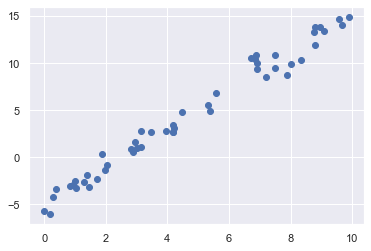

In [2]:
slope     = 2
intercept = 5

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)   ## 0~10 사이 50개의 점
y = slope * x - intercept + rng.randn(50)

plt.scatter(x, y)
plt.show()

In [3]:
rng.rand(50)   ## parameter : 랜덤 값의 개수

array([0.93259546, 0.69681816, 0.06600017, 0.75546305, 0.75387619,
       0.92302454, 0.71152476, 0.12427096, 0.01988013, 0.02621099,
       0.02830649, 0.24621107, 0.86002795, 0.53883106, 0.55282198,
       0.84203089, 0.12417332, 0.27918368, 0.58575927, 0.96959575,
       0.56103022, 0.01864729, 0.80063267, 0.23297427, 0.8071052 ,
       0.38786064, 0.86354185, 0.74712164, 0.55624023, 0.13645523,
       0.05991769, 0.12134346, 0.04455188, 0.10749413, 0.22570934,
       0.71298898, 0.55971698, 0.01255598, 0.07197428, 0.96727633,
       0.56810046, 0.20329323, 0.25232574, 0.74382585, 0.19542948,
       0.58135893, 0.97001999, 0.8468288 , 0.23984776, 0.49376971])

Sickit-Learn의 ```LinearReression```Estimator를 사용해서 위 데이터를 가장 잘 표현하는 직선을 찾을 수 있다.

In [4]:
x.shape

(50,)

In [5]:
x[:, np.newaxis].shape

(50, 1)

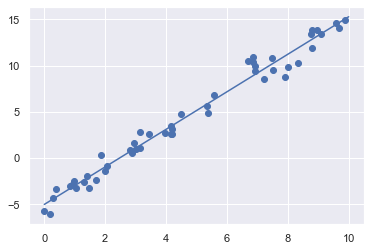

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)   ## x가 2차원이어야함!

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

모델 학습이 끝난 후 학습된 파라미터들은 model.{파라미터이름}_ 의 형태로 저장된다. 기울기와 y절편은 아래와 같이 출력할 수 있다.

In [7]:
print("Model Slope     :", model.coef_[0])
print("Model intercept :", model.intercept_)

Model Slope     : 2.0272088103606953
Model intercept : -4.998577085553204


```LinearRegression``` Estimator는 위의 예제와 같은 1차원 입력 뿐만 아니라 다차원 입력을 사용한 선형모델을 다룰 수 있다.  
다차원 선형 무델은 다음과 같은 형태를 가진다.
$$ y = a_0 + a_1x_1 + a_2x_2 + \cdots $$

기하학적으로 hyper-plane으로 데이터를 표현하는 것이라고 말할 수 있다.

In [8]:
rng = np.random.RandomState(1)
rng.rand(100, 3).shape

(100, 3)

In [9]:
slope     = [1.5, -2., -1.]  ## 열벡터
intercept = 0.5

rng = np.random.RandomState(1)
X   = 10 * rng.rand(100, 3)   ## 대문자는 2차원 이상의 행렬/벡터
y   = intercept + np.dot(X, slope)  ## 소문자는 스칼라/열벡터/행벡터

model.fit(X, y)

LinearRegression()

In [10]:
print(X[0])
print(np.dot(X[0], slope))
print(y.shape)

[4.17022005e+00 7.20324493e+00 1.14374817e-03]
-8.152303546478
(100,)


In [11]:
print(model.intercept_)
print(model.coef_)

0.5000000000000124
[ 1.5 -2.  -1. ]


In [12]:
X[:5]

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03],
       [3.02332573e+00, 1.46755891e+00, 9.23385948e-01],
       [1.86260211e+00, 3.45560727e+00, 3.96767474e+00],
       [5.38816734e+00, 4.19194514e+00, 6.85219500e+00],
       [2.04452250e+00, 8.78117436e+00, 2.73875932e-01]])

y값들은 랜덤하게 생성된 3차원의 x값과 계수들(\[1.5, -2., 1.\])을 곱함으로써 생성되었는데, Linear Regression을 통해서 이 계수들을 계산해 낼 수 있다는 것을 알 수 있다.